# Assignment 5 - AirBnB



In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import math 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

filename_tsv = "data/listings.csv"

tsv_read = pd.read_csv(filename_tsv)
tsv_read = tsv_read.sort_values(by=['price'], ascending=True)





I'll do the iteration and separate all apartments by price

In [37]:

def getPrices(df):
    
    prices = list(tsv_read.price)
    price_mean = tsv_read.price.mean()
    price_std = tsv_read.price.std()

    reallyCheap = 0
    cheap = 0
    expensive = 0
    reallyExpensive = 0
    for price in prices:
        if (price < price_mean-price_std):
            reallyCheap += 1
        elif (price < price_mean):
            cheap +=1
        elif (price > price_mean + price_std):
            reallyExpensive +=1
        elif (price > price_mean):
            expensive +=1

    print( " R cheap  " + str(reallyCheap))
    print( " cheap  " + str(cheap))
    print( " R exp  " + str(reallyExpensive))
    print( " exp  " + str(expensive))
    return reallyCheap, cheap, reallyExpensive, expensive

getPrices(tsv_read)

        

 R cheap  0
 cheap  16747
 R exp  374
 exp  3307


(0, 16747, 374, 3307)

We can se that there are 0 really cheap apartments, 16747 cheap ones, 3207 expensive and 374 really expensive. I found this results unhelping, so I removed outliers in order to obtain really cheap apartments and a better distributed results. 

In [38]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

tsv_read = remove_outlier(tsv_read, "price")
getPrices(tsv_read)

 R cheap  2095
 cheap  9140
 R exp  3037
 exp  4436


(2095, 9140, 3037, 4436)

#### Now I obtained more useful results

2) We want to know what feature defines better the price between the following features:

neighbourhood_group, neighbourhood, latitude, longitude, room_type, minimum_nights, number_of_reviews, reviews_per_month, availability_365.

Make a Decision Tree Classifier, plot the resulting decision tree and draw your conclusions.

 R cheap  2095
 cheap  9140
 R exp  3037
 exp  4436


[Text(1274.3689523870075, 2140.425, 'X[4] <= 1.5\ngini = 0.665\nsamples = 13095\nvalue = [1454, 6424, 2115, 3102]'),
 Text(632.8885754374521, 2072.475, 'X[5] <= 26.5\ngini = 0.651\nsamples = 5777\nvalue = [90, 1567, 1468, 2652]'),
 Text(324.58165396875495, 2004.525, 'X[5] <= 1.5\ngini = 0.577\nsamples = 3858\nvalue = [29, 551, 1081, 2197]'),
 Text(184.82803328750464, 1936.575, 'X[8] <= 353.5\ngini = 0.635\nsamples = 1428\nvalue = [27, 287, 416, 698]'),
 Text(106.35851488551637, 1868.625, 'X[1] <= 39.5\ngini = 0.63\nsamples = 1298\nvalue = [21, 281, 344, 652]'),
 Text(21.172855745333404, 1800.6750000000002, 'X[1] <= 5.5\ngini = 0.667\nsamples = 448\nvalue = [7, 121, 139, 181]'),
 Text(2.5178996351329914, 1732.7250000000001, 'X[3] <= 2.205\ngini = 0.275\nsamples = 26\nvalue = [1, 1, 2, 22]'),
 Text(1.2589498175664957, 1664.775, 'X[3] <= 2.164\ngini = 0.667\nsamples = 3\nvalue = [1, 1, 1, 0]'),
 Text(0.6294749087832479, 1596.825, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(1.8

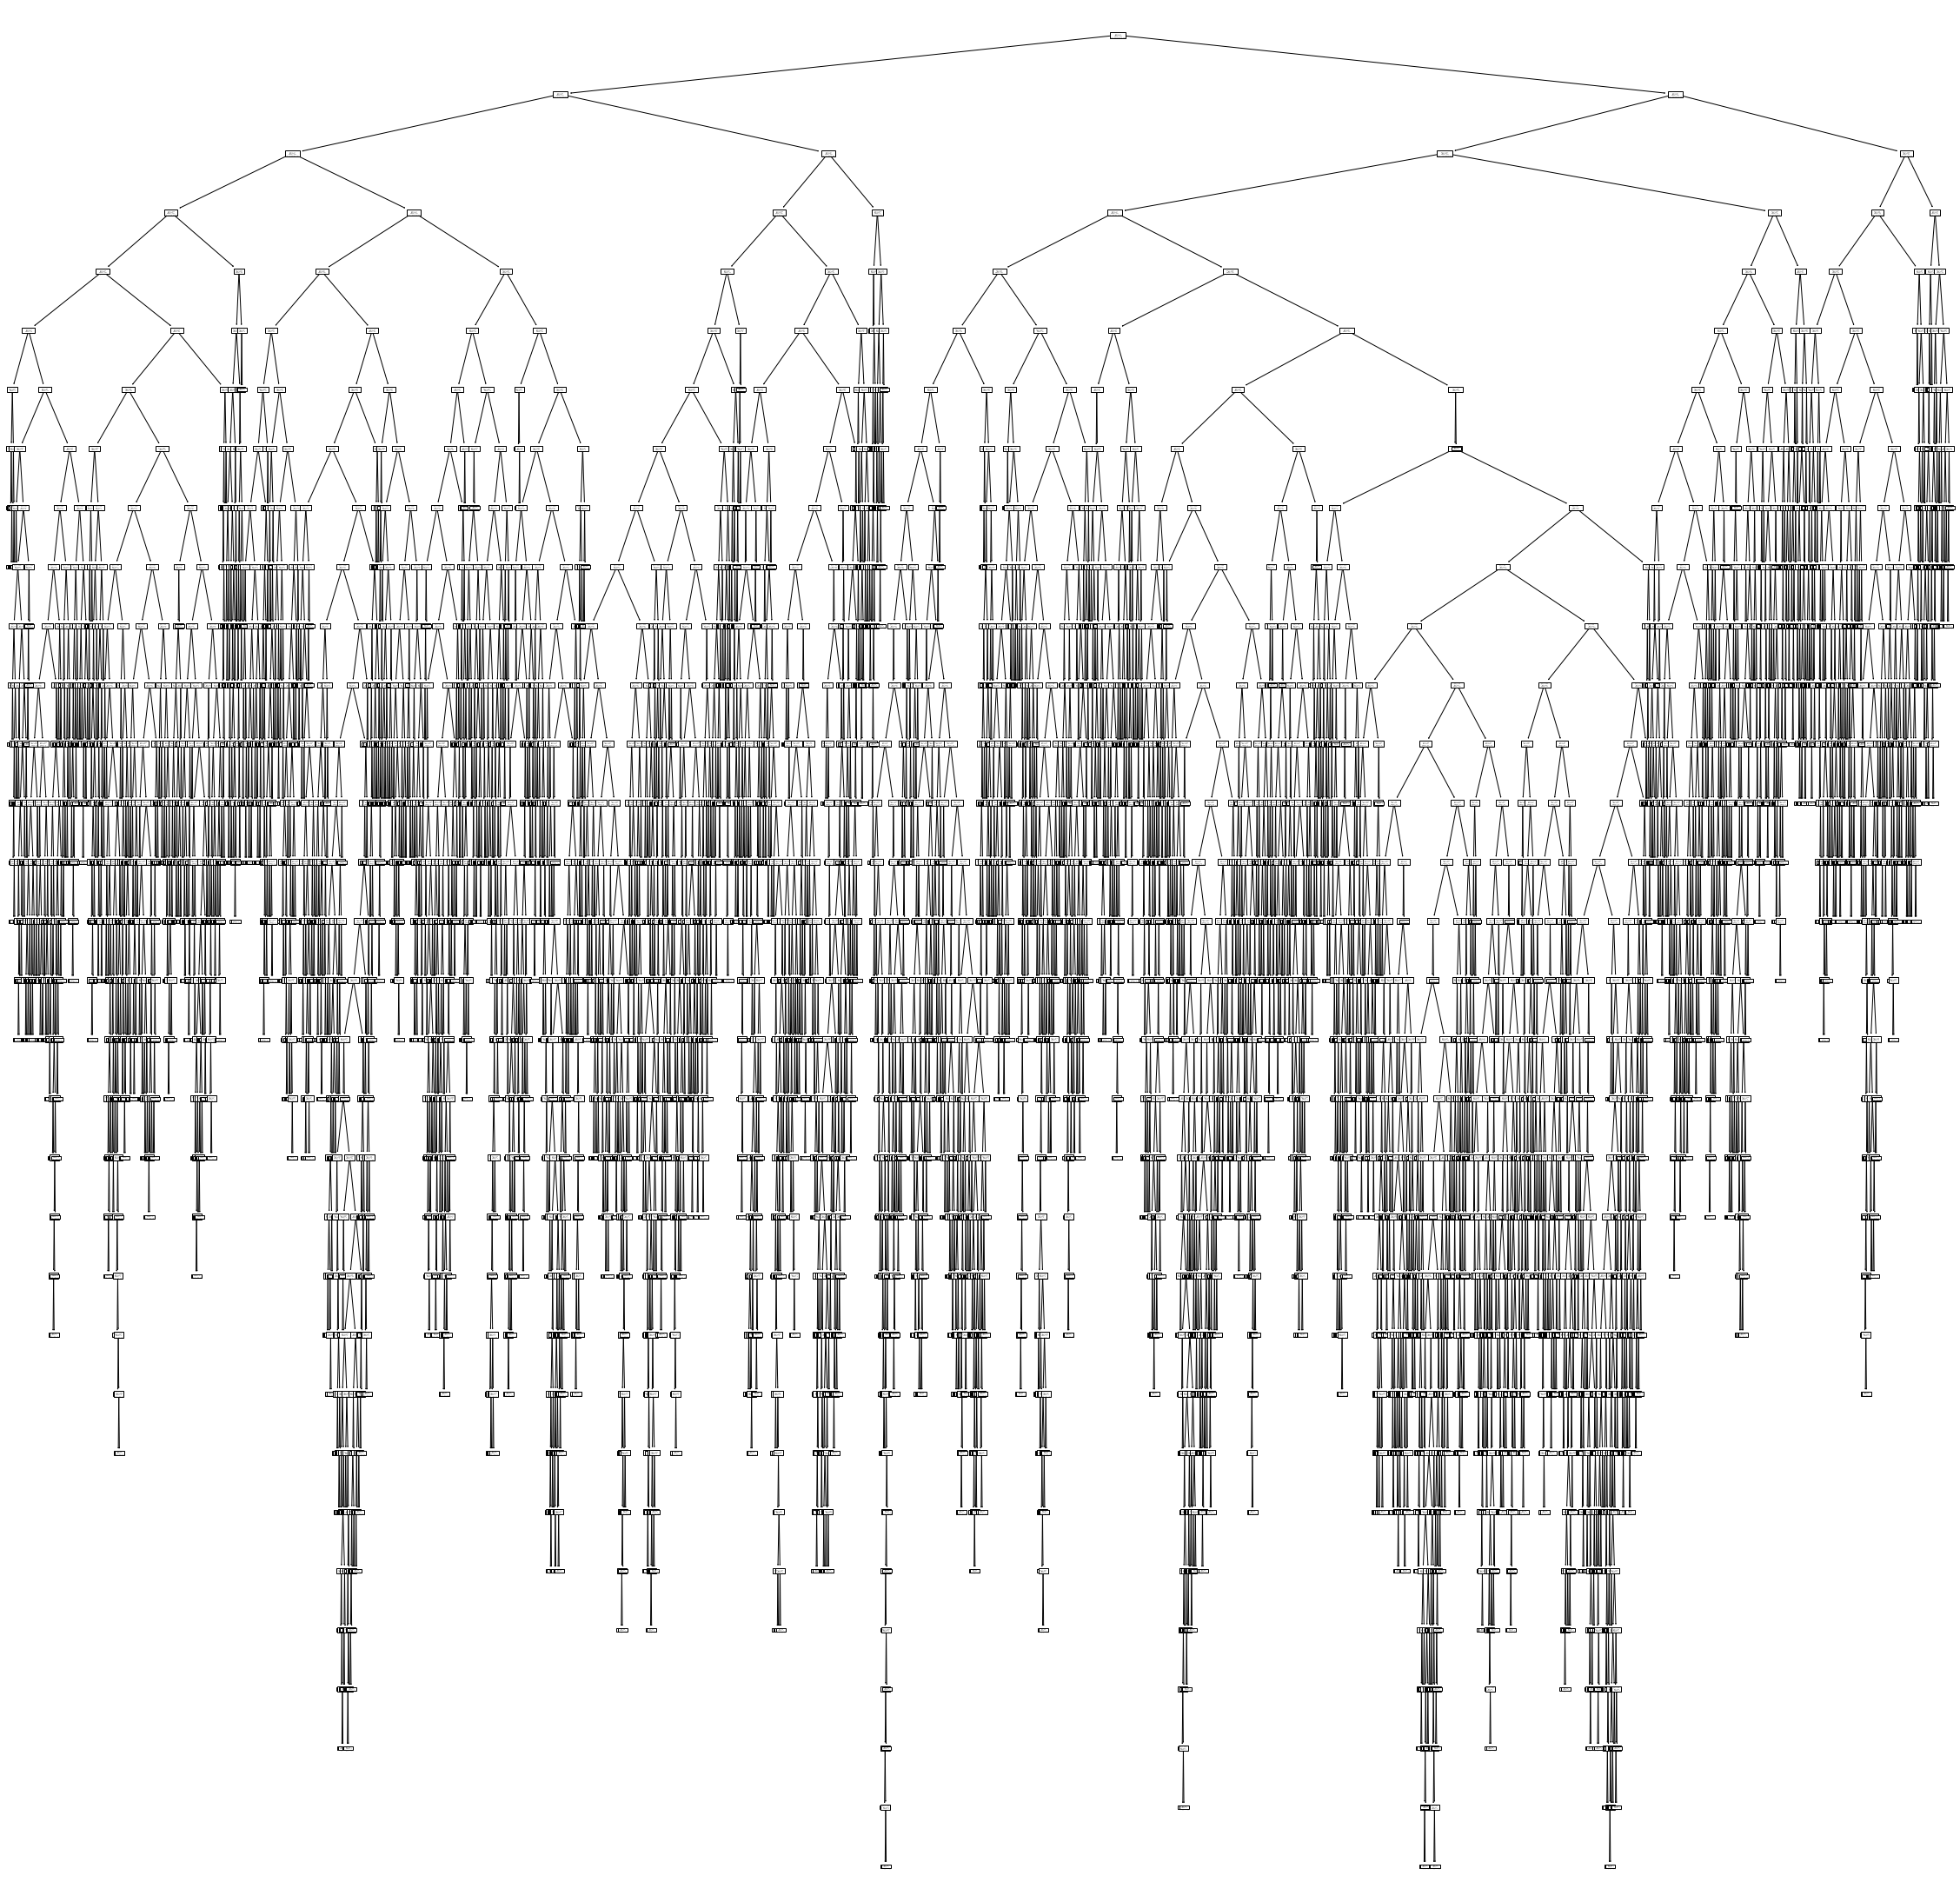

In [39]:

a,b,c,d = getPrices(tsv_read)
# Labels:
rCheap = [0] * a
cheap = [1] * b
rExp = [2] * c
exp = [3] * d

labels = list()
labels = rCheap + cheap + rExp + exp


tsv_read = tsv_read.fillna(value=0)
tsv_read.room_type = pd.Categorical(tsv_read.room_type) 
tsv_read.room_type = tsv_read.room_type.cat.codes

tsv_read.neighbourhood_group = pd.Categorical(tsv_read.neighbourhood_group) 
tsv_read.neighbourhood_group = tsv_read.neighbourhood_group.cat.codes

tsv_read.neighbourhood = pd.Categorical(tsv_read.neighbourhood) 
tsv_read.neighbourhood = tsv_read.neighbourhood.cat.codes

y = ["neighbourhood_group", "neighbourhood", "latitude", "longitude", "room_type", "minimum_nights"\
     , "number_of_reviews", "reviews_per_month", "availability_365"]
X=tsv_read[y] 

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3) # 70% training and 30% test

dt_clf = DecisionTreeClassifier()
fig=plt.figure(figsize=(40, 40))
plot_tree(dt_clf.fit(X_train,y_train))

3) Try two Random Forests Classification: one classifying the apartments with the previous categories as classes of apartments, and a second one where the numerical price is the classifier feature. Measure the out-of-bag accuracy (you will have to set the oob_score=True to be able to get within the variable ​oob_score_ ​the score otherwise is not computed). Which one works better?

In [41]:
clf = RandomForestClassifier(max_depth=2, oob_score=True)
clf.fit(X_train, y_train)
#clf.fit(x, ["neighbourhood_group", "neighbourhood", "latitude", "longitude", "room_type", "minimum_nights"\
 #    , "number_of_reviews", "reviews_per_month", "availability_365"])

print("Score with several features: "  + str(clf.oob_score_))

prices = tsv_read.price
#prices = [[x] for x in tsv_read.price]

clf.fit(np.reshape(list(prices),(-1,1)), labels)
print("Score with price as a feature: "  + str(clf.oob_score_))



Score with several features: 0.5973272241313479
Score with price as a feature: 0.9995189223861449


I got a bad score classifying with several features, but even a worse one when I got the numerical price as the classifier feature. I think that I should obtain 1.0 from the second random forest, because I'm classifying with the price. I don't know why this is happening.

Edit:

Now I obtained the expected results for the second random forest, and It improved also a bit for the first random forest classifier. The second one finally works better than the first one.
